In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
transaction = pd.read_csv("Fraud.csv")

In [3]:
transaction.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
transaction.shape

(6362620, 11)

In [5]:
transaction.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

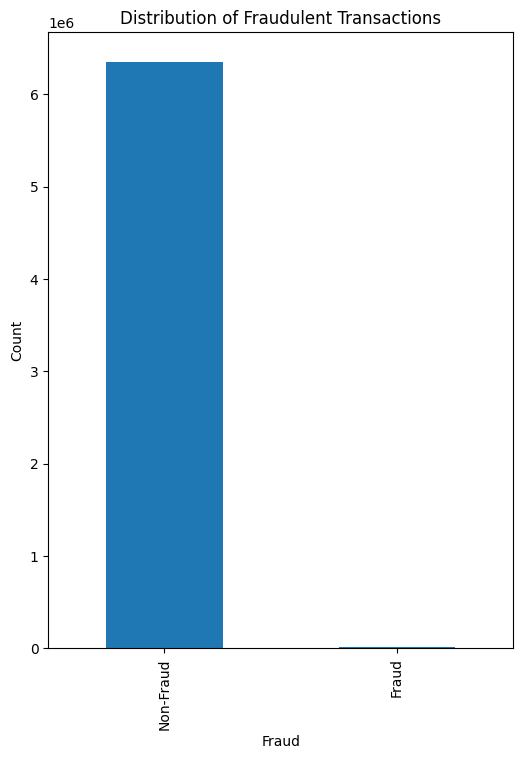

In [6]:

# Plotting the bar plot
fraud_counts = transaction['isFraud'].value_counts()
plt.figure(figsize=(6,8))
fraud_counts.plot(kind='bar')
plt.xlabel('Fraud')
plt.ylabel('Count')
plt.title('Distribution of Fraudulent Transactions')
plt.xticks([0, 1], ['Non-Fraud', 'Fraud'])  # Customizing x-axis tick labels
plt.show()

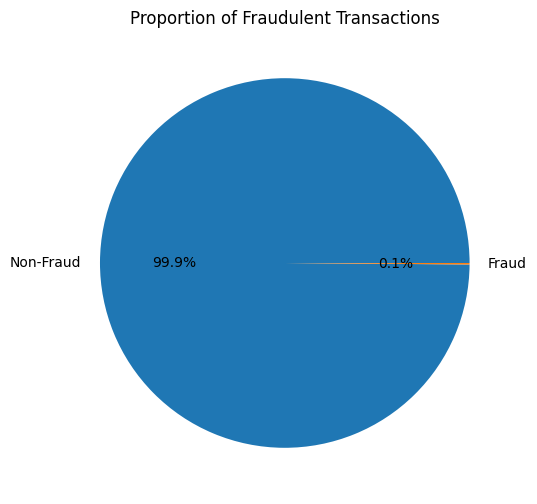

In [7]:
fraud_counts = transaction['isFraud'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(fraud_counts, labels=['Non-Fraud', 'Fraud'], autopct='%1.1f%%')
plt.title('Proportion of Fraudulent Transactions')
plt.show()

***As you can see the fraud transaction are only 0.1 percent which is very less compared to successful transaction ***

In [8]:
fraud_counts = transaction['isFraud'].value_counts()

# Count of non-fraudulent transactions (0)
non_fraud_count = fraud_counts[0]

# Count of fraudulent transactions (1)
fraud_count = fraud_counts[1]

print("Non-fraudulent transactions:", non_fraud_count)
print("Fraudulent transactions:", fraud_count)

Non-fraudulent transactions: 6354407
Fraudulent transactions: 8213


# Data Cleaning:-

***'step': The 'step' column represents a unit of time in the simulated transaction. While useful for identifying physical patterns, it is not directly relevant to fraud detection. In most cases, the transaction log is not important for detecting fraud.***

***'nameOrig' and 'nameDest': These fields contain unique identifiers for the sender and receiver of the transaction.
While they may help monitor individual organizations, they may not directly assist in fraud detection. In most cases, fraud patterns are determined by market characteristics rather than the specific entities involved.***

***"isFlaggedFraud": The "isFlaggedFraud" column indicates whether the transaction has been flagged as potentially fraudulent. However, in many documents around the world, there may be few or no instances where this column is marked with 1 (indicating that it has been flagged for fraud). This will make it less useful to train fraud models, especially if the number of positive cases is negligible.***

In [9]:
transaction.drop(columns=["step" , "nameOrig" , "nameDest" , "isFlaggedFraud"],inplace=True)

In [10]:
transaction

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,PAYMENT,9839.64,170136.00,160296.36,0.00,0.00,0
1,PAYMENT,1864.28,21249.00,19384.72,0.00,0.00,0
2,TRANSFER,181.00,181.00,0.00,0.00,0.00,1
3,CASH_OUT,181.00,181.00,0.00,21182.00,0.00,1
4,PAYMENT,11668.14,41554.00,29885.86,0.00,0.00,0
...,...,...,...,...,...,...,...
6362615,CASH_OUT,339682.13,339682.13,0.00,0.00,339682.13,1
6362616,TRANSFER,6311409.28,6311409.28,0.00,0.00,0.00,1
6362617,CASH_OUT,6311409.28,6311409.28,0.00,68488.84,6379898.11,1
6362618,TRANSFER,850002.52,850002.52,0.00,0.00,0.00,1


In [11]:
transaction.shape

(6362620, 7)

In [12]:
transaction.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0
1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0
2,TRANSFER,181.00,181.0,0.00,0.0,0.0,1
3,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1
4,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0


In [13]:
transaction.describe()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03
std,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00
75%,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00
max,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00


In [14]:
transaction["type"].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [15]:
type_counts = transaction['type'].value_counts()
print(type_counts)


CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64


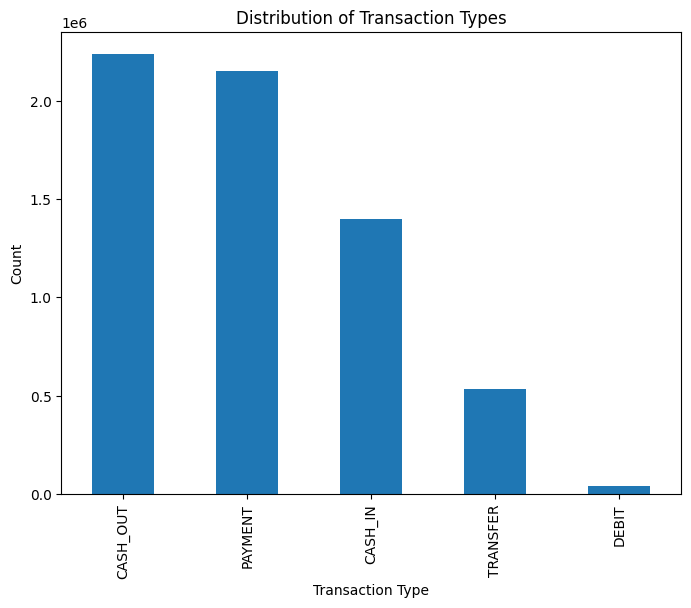

In [16]:
plt.figure(figsize=(8, 6))
type_counts.plot(kind='bar')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.title('Distribution of Transaction Types')
plt.show()

here we can see that CASH_OUT has maximum number of count in transaction process,
and Debit has minimum number of count in transaction process.

***Finding the Outliers:-***

In [17]:
transaction.isnull().sum()

type              0
amount            0
oldbalanceOrg     0
newbalanceOrig    0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

No null values or missing values are there in this dataset

In [18]:
transaction.describe()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03
std,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00
75%,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00
max,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00


***BOXPLOT FOR CHECKING THE OUTLIERS:-***

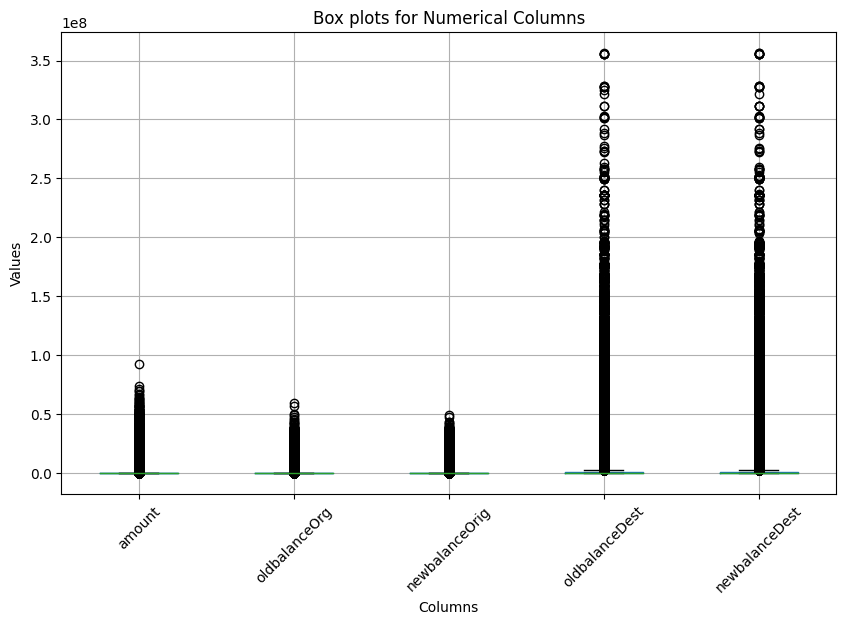

In [19]:
numeric_columns = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

plt.figure(figsize=(10, 6))
transaction[numeric_columns].boxplot()
plt.title('Box plots for Numerical Columns')
plt.ylabel('Values')
plt.xlabel('Columns')
plt.xticks(rotation=45)
plt.show()

***CHECKING THE SKEWNESS:-***

C:\Users\Tanay's PC\AppData\Local\Temp\ipykernel_21876\2259381171.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(transaction['amount'])
C:\Users\Tanay's PC\AppData\Local\Temp\ipykernel_21876\2259381171.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(transaction['oldbalanceOrg'])
C:\User

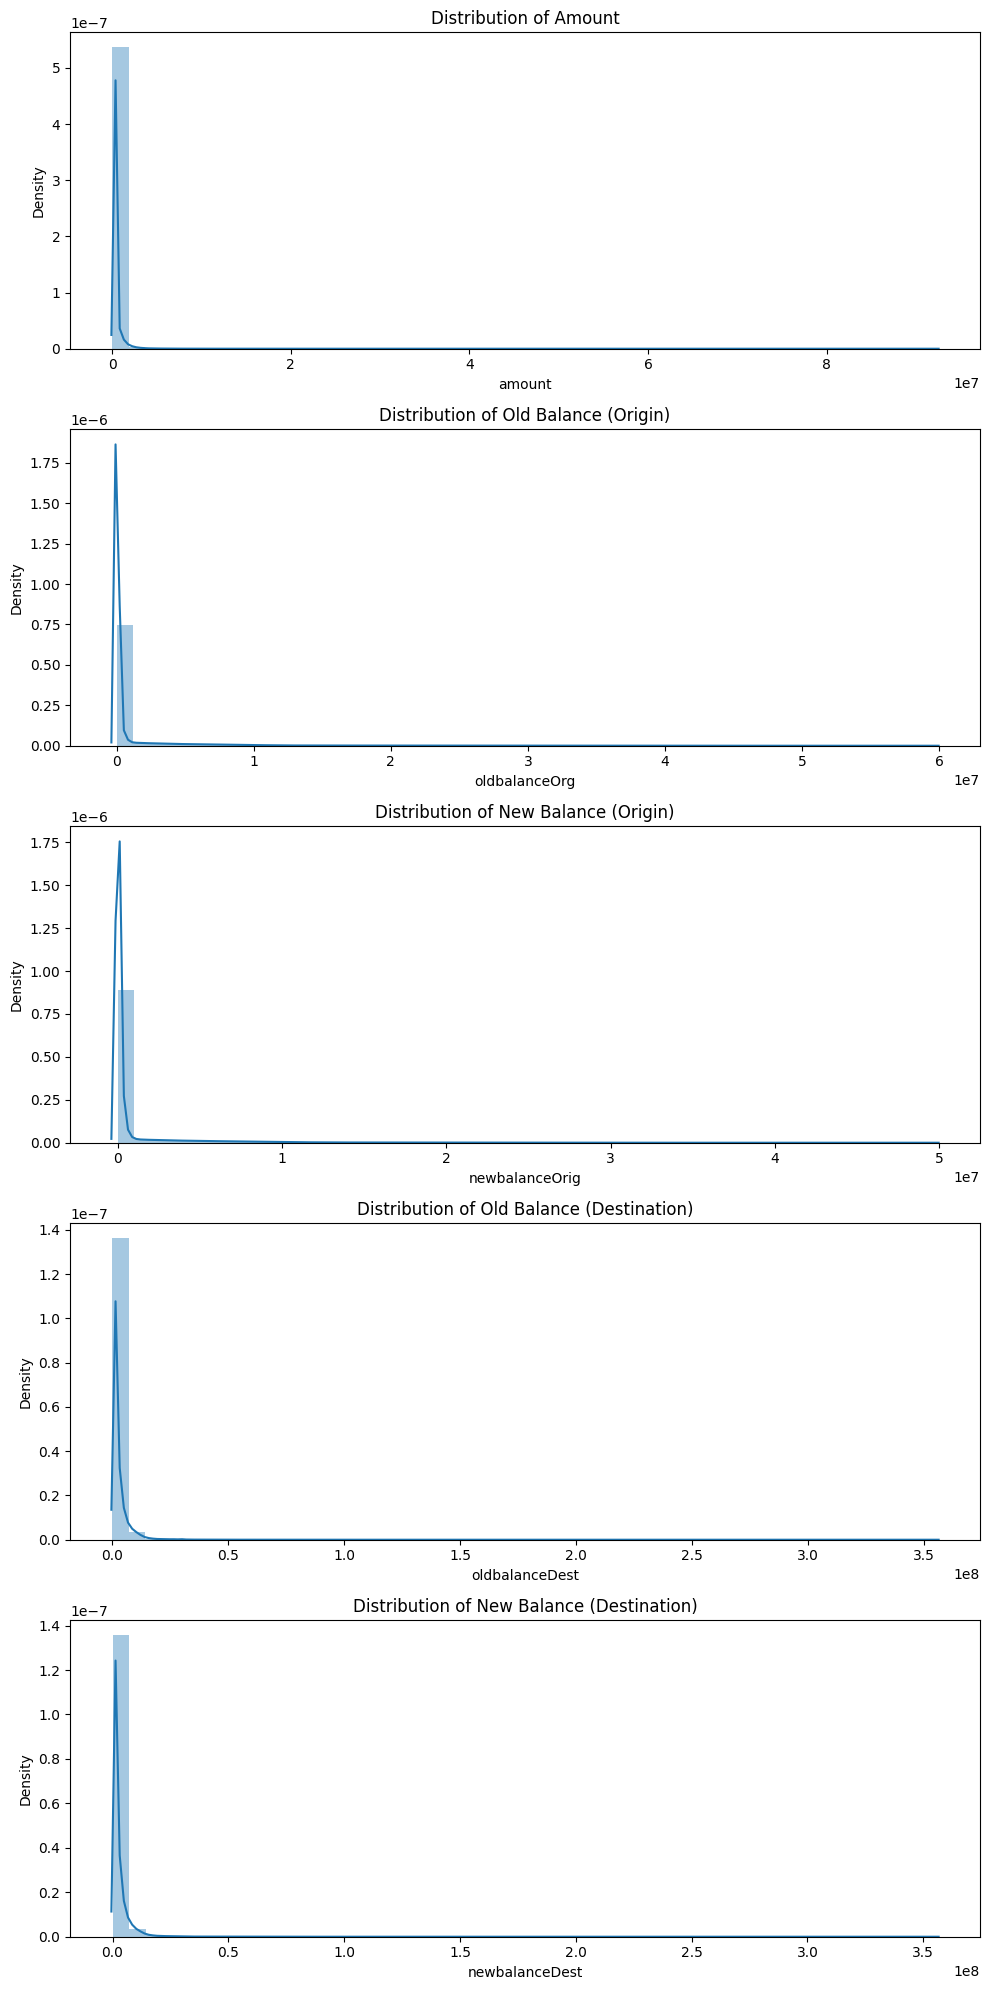

In [20]:
plt.figure(figsize=(10, 20))

plt.subplot(5, 1, 1)
sns.distplot(transaction['amount'])
plt.title('Distribution of Amount')

plt.subplot(5, 1, 2)
sns.distplot(transaction['oldbalanceOrg'])
plt.title('Distribution of Old Balance (Origin)')

plt.subplot(5, 1, 3)
sns.distplot(transaction['newbalanceOrig'])
plt.title('Distribution of New Balance (Origin)')

plt.subplot(5, 1, 4)
sns.distplot(transaction['oldbalanceDest'])
plt.title('Distribution of Old Balance (Destination)')

plt.subplot(5, 1, 5)
sns.distplot(transaction['newbalanceDest'])
plt.title('Distribution of New Balance (Destination)')

plt.tight_layout()
plt.show()


In [21]:
# Assuming 'data' is the DataFrame containing your dataset
min_amount = transaction['amount'].min()
max_amount = transaction['amount'].max()

min_oldbalanceorg = transaction['oldbalanceOrg'].min()
max_oldbalanceorg = transaction['oldbalanceOrg'].max()

min_newbalanceorig = transaction['newbalanceOrig'].min()
max_newbalanceorig = transaction['newbalanceOrig'].max()

min_oldbalancedest = transaction['oldbalanceDest'].min()
max_oldbalancedest = transaction['oldbalanceDest'].max()

min_newbalancedest = transaction['newbalanceDest'].min()
max_newbalancedest = transaction['newbalanceDest'].max()

print("Minimum value in 'amount':", min_amount)
print("Maximum value in 'amount':", max_amount)

print("Minimum value in 'oldbalanceOrg':", min_oldbalanceorg)
print("Maximum value in 'oldbalanceOrg':", max_oldbalanceorg)

print("Minimum value in 'newbalanceOrig':", min_newbalanceorig)
print("Maximum value in 'newbalanceOrig':", max_newbalanceorig)

print("Minimum value in 'oldbalanceDest':", min_oldbalancedest)
print("Maximum value in 'oldbalanceDest':", max_oldbalancedest)

print("Minimum value in 'newbalanceDest':", min_newbalancedest)
print("Maximum value in 'newbalanceDest':", max_newbalancedest)


Minimum value in 'amount': 0.0
Maximum value in 'amount': 92445516.64
Minimum value in 'oldbalanceOrg': 0.0
Maximum value in 'oldbalanceOrg': 59585040.37
Minimum value in 'newbalanceOrig': 0.0
Maximum value in 'newbalanceOrig': 49585040.37
Minimum value in 'oldbalanceDest': 0.0
Maximum value in 'oldbalanceDest': 356015889.35
Minimum value in 'newbalanceDest': 0.0
Maximum value in 'newbalanceDest': 356179278.92


***Finding Boundry Values :- *** 

***With the help of Z-score method***

In [22]:

# Assuming 'data' is the DataFrame containing your dataset
columns = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']
zscore_threshold = 3  # Define the threshold for z-scores

boundary_values = {}

for column in columns:
    zscores = (transaction[column] - transaction[column].mean()) / transaction[column].std()
    outliers = np.abs(zscores) > zscore_threshold
    min_value = transaction[column][~outliers].min()
    max_value = transaction[column][~outliers].max()
    boundary_values[column] = (min_value, max_value)

# Print the boundary values for each column
for column, (min_value, max_value) in boundary_values.items():
    print("Boundary values for column '{}' using z-score method are: Min: {}, Max: {}".format(column, min_value, max_value))


Boundary values for column 'amount' using z-score method are: Min: 0.0, Max: 1991430.28
Boundary values for column 'oldbalanceOrg' using z-score method are: Min: 0.0, Max: 9498599.12
Boundary values for column 'newbalanceOrig' using z-score method are: Min: 0.0, Max: 9627250.89
Boundary values for column 'oldbalanceDest' using z-score method are: Min: 0.0, Max: 11298241.33
Boundary values for column 'newbalanceDest' using z-score method are: Min: 0.0, Max: 12247251.93


***CAPPING:-***

In [23]:
# Assuming 'transaction' is the DataFrame containing your dataset
boundary_values = {
    'amount': (0.0, 1991430.28),
    'oldbalanceOrg': (0.0, 9498599.12),
    'newbalanceOrig': (0.0, 9627250.89),
    'oldbalanceDest': (0.0, 11298241.33),
    'newbalanceDest': (0.0, 12247251.93)
}

# Perform capping for each column
for column, (min_value, max_value) in boundary_values.items():
    transaction[column] = transaction[column].clip(lower=min_value, upper=max_value)

# Verify the updated dataset
print(transaction.head())


       type    amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
0   PAYMENT   9839.64       170136.0       160296.36             0.0   
1   PAYMENT   1864.28        21249.0        19384.72             0.0   
2  TRANSFER    181.00          181.0            0.00             0.0   
3  CASH_OUT    181.00          181.0            0.00         21182.0   
4   PAYMENT  11668.14        41554.0        29885.86             0.0   

   newbalanceDest  isFraud  
0             0.0        0  
1             0.0        0  
2             0.0        1  
3             0.0        1  
4             0.0        0  


In [24]:
transaction.shape

(6362620, 7)

***Now the values has been updated after the Capping operation ***

In [25]:
transaction.describe()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,1.599807e+05,6.799496e+05,7.006026e+05,9.839359e+05,1.097737e+06,1.290820e-03
std,2.637227e+05,1.990986e+06,2.030530e+06,2.029741e+06,2.170145e+06,3.590480e-02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00
75%,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00
max,1.991430e+06,9.498599e+06,9.627251e+06,1.129824e+07,1.224725e+07,1.000000e+00


C:\Users\Tanay's PC\AppData\Local\Temp\ipykernel_21876\2216962232.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(transaction['amount'])
C:\Users\Tanay's PC\AppData\Local\Temp\ipykernel_21876\2216962232.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(transaction['oldbalanceOrg'])
C:\User

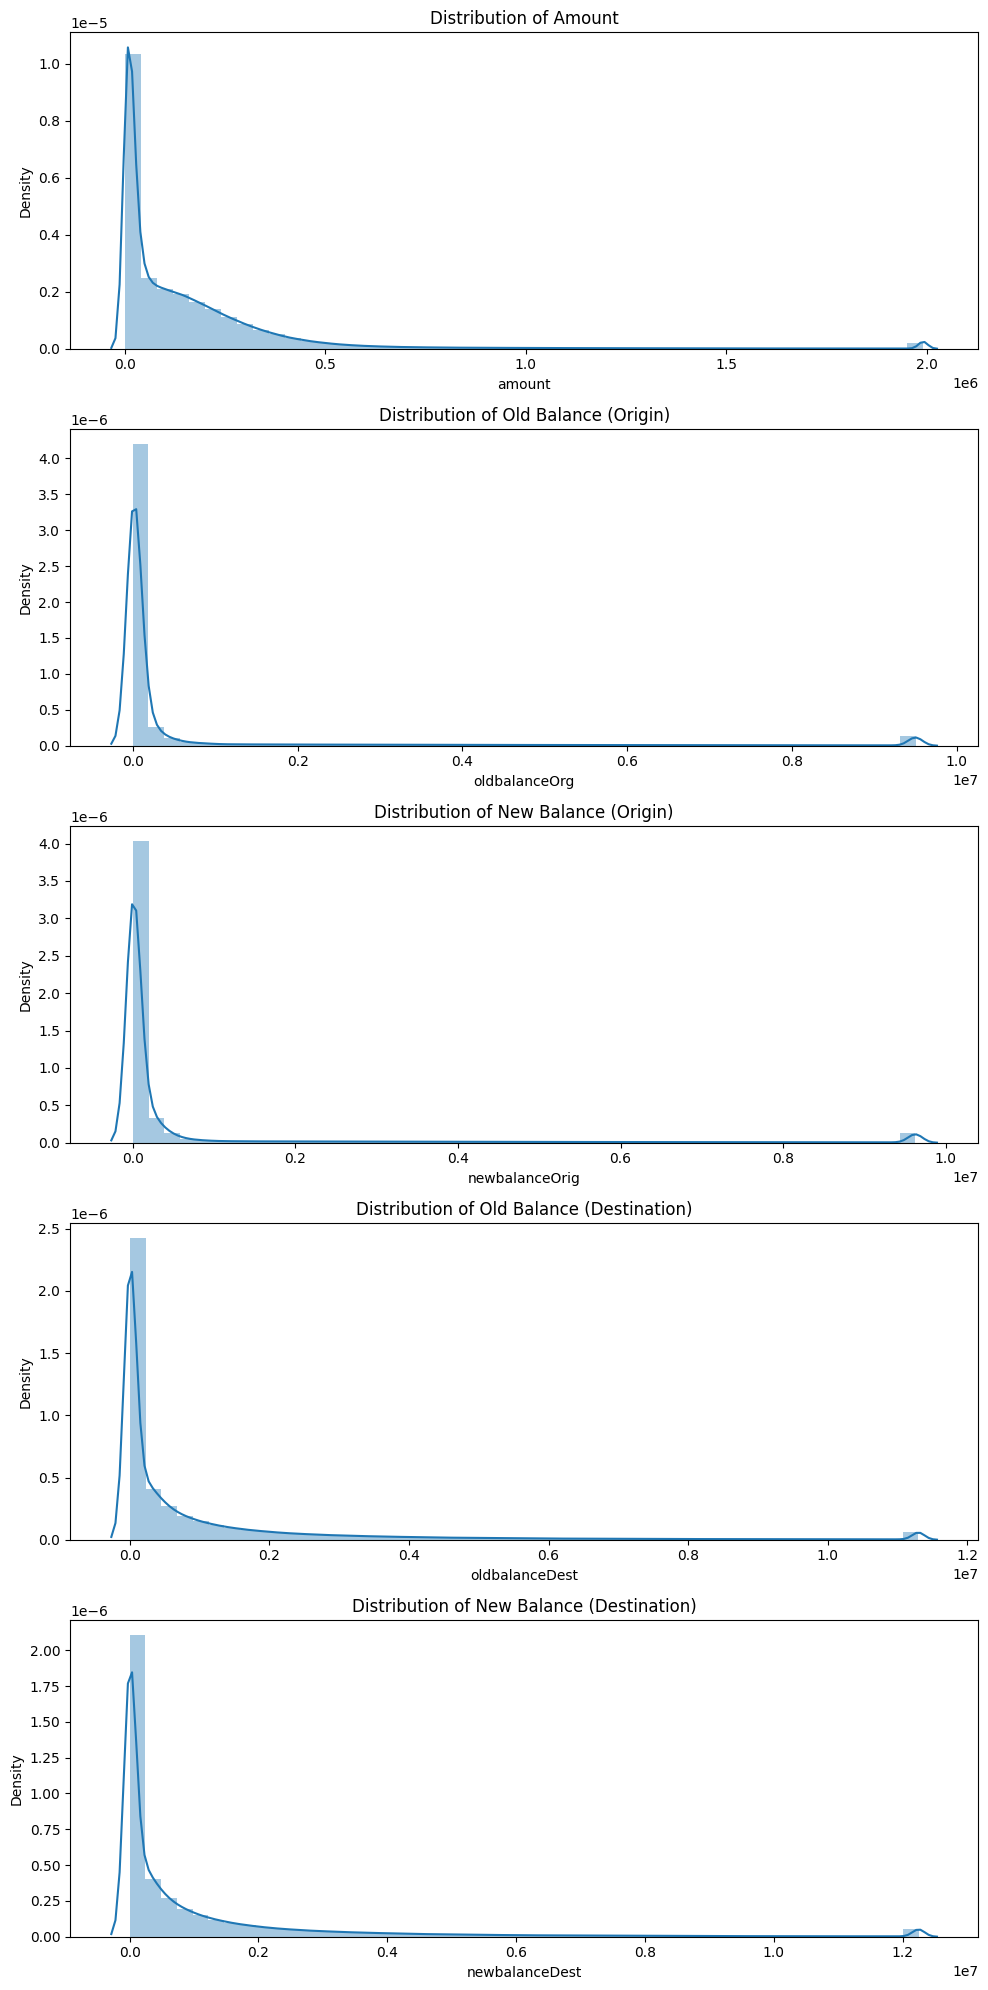

In [26]:
plt.figure(figsize=(10, 20))

plt.subplot(5, 1, 1)
sns.distplot(transaction['amount'])
plt.title('Distribution of Amount')

plt.subplot(5, 1, 2)
sns.distplot(transaction['oldbalanceOrg'])
plt.title('Distribution of Old Balance (Origin)')

plt.subplot(5, 1, 3)
sns.distplot(transaction['newbalanceOrig'])
plt.title('Distribution of New Balance (Origin)')

plt.subplot(5, 1, 4)
sns.distplot(transaction['oldbalanceDest'])
plt.title('Distribution of Old Balance (Destination)')

plt.subplot(5, 1, 5)
sns.distplot(transaction['newbalanceDest'])
plt.title('Distribution of New Balance (Destination)')

plt.tight_layout()
plt.show()

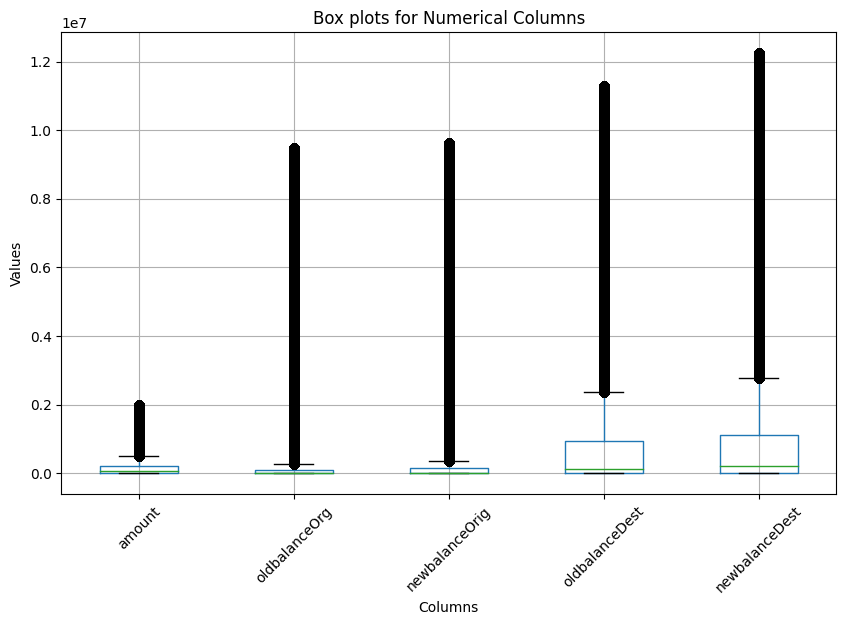

In [27]:
numeric_columns = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

plt.figure(figsize=(10, 6))
transaction[numeric_columns].boxplot()
plt.title('Box plots for Numerical Columns')
plt.ylabel('Values')
plt.xlabel('Columns')
plt.xticks(rotation=45)
plt.show()

***As you can see above we have little bit solve the outlier problem, It looks better now than before***

# Marking Target and Predictor Variable:-

In [28]:
X = transaction.drop(columns=['isFraud'])        #predictor variable

In [29]:
X.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
0,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0
1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0
2,TRANSFER,181.00,181.0,0.00,0.0,0.0
3,CASH_OUT,181.00,181.0,0.00,21182.0,0.0
4,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0


In [30]:
y = transaction['isFraud']                #target variable

In [42]:
y.head()

0    0
1    0
2    1
3    1
4    0
Name: isFraud, dtype: int64

# Splitting the dataset for training and testing:-

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X_train , X_test , y_train , y_test = train_test_split(X,y , test_size=0.2 , random_state=42)     #test size=20 percent , train size=70 percent

In [45]:
X_train.shape

(5090096, 6)

In [46]:
X_test.shape

(1272524, 6)

# Pipelining:-

In [80]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder , StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score
import xgboost as xgb

In [81]:
column_trans = ColumnTransformer([
    ('ohe_location',OneHotEncoder(sparse=False,handle_unknown='ignore'),[0])
],remainder='passthrough')

In [82]:
scaler = StandardScaler()

# Decision Tree Classifier:-

In [74]:
tree_classifier = DecisionTreeClassifier()

In [75]:
pipe = make_pipeline(column_trans , scaler , tree_classifier )

In [76]:
pipe.fit(X_train , y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe_location',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  [0])])),
                ('standardscaler', StandardScaler()),
                ('decisiontreeclassifier', DecisionTreeClassifier())])

In [77]:
y_pred = pipe.predict(X_test)

In [78]:
r2_score(y_test , y_pred)

0.8083980544460116

# XGBoost:-

In [83]:
xgb_classifier = xgb.XGBClassifier()

In [85]:
pipe = make_pipeline(column_trans , scaler , xgb_classifier )

In [86]:
pipe.fit(X_train , y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe_location',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  [0])])),
                ('standardscaler', StandardScaler()),
                ('xgbclassifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               ear...
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=None, ...))])

In [87]:
y_pred_XGB = pipe.predict(X_test)

In [88]:
r2_score(y_test , y_pred_XGB)

0.7886197890985032

***Both the Algorithms are performing well Decision Tree Classifier is giving the accuracy nearly 81 percent and XGBoost is giving the accuracy nearly 79 percent ***

# KEY FACTORS THAT PREDICT FRAUDLENT CUSTOMERS:-

***Predicting fraudulent customers typically involves analyzing various factors or features that exhibit suspicious behavior or patterns. While the specific factors may vary depending on the dataset and domain, here are some common key factors that can help predict fraudulent customers: ***

***Transaction Amount: Unusually large or small transaction amounts compared to the customer's typical behavior or compared to the average transaction amount in the dataset can be indicative of fraud.

***Transaction Frequency: Unusually high transaction frequency, such as multiple transactions within a short period or frequent transactions at odd hours, can raise suspicion.

***Account Balance Changes: Sudden and significant changes in the customer's account balance, such as a rapid decrease or increase, may indicate fraudulent activity. 

# prevention should be adopted while company update its infrastructure:-

***As companies update their infrastructure, many measures need to be taken to ensure the security and integrity of the system. Here are some important precautions to keep in mind during infrastructure changes:***

Do a security assessment: Before making any changes to your infrastructure, do a safe security assessment to be aware of the downside and potential risks. This may include penetration testing, vulnerability scans and code reviews to ensure vulnerabilities are resolved before deployment.

Enable effective authentication and access control: Streamline authentication processes through strong password management, multi-factor authentication, and mission-appropriate access control. Access to critical systems and information is restricted according to the principle of minimum.
Update and patch systems: Make sure all software, operating systems, and firmware have the latest security patches. Use regular security updates to fix known issues and reduce the risk of exploits.

Encrypt Sensitive Data: Protect sensitive data with encryption techniques at rest and in transit. Encryption techniques are used in communication and data storage to protect the confidentiality and integrity of data.

Network Infrastructure Security: Use network security measures such as firewalls, intrusion detection systems (IDS), and intrusion prevention systems (IPS) to monitor and protect networks against Inaccessibility and resistance.
Backup and Disaster Recovery: Establish regular backup procedures and implement a disaster recovery plan. This ensures that data can be recovered in the event of a malfunction, natural disaster, or security breach.

User Awareness and Training: Organize regular security awareness training to educate employees about computer security, engineering practices, and the importance of following rules and security procedures.

Incident Response Plan: Create an incident response plan that describes the steps to be taken in the event of a security incident or breach. Define roles and responsibilities, communicate and conduct regular exercises to evaluate the effectiveness of the plan.
Monitoring and Recording: Complete the decision making and monitoring process to monitor and identify unusual or suspicious activity. Monitor network connectivity, system log, and security status to determine real-time security statuses.

# To determine how security and performance measures have been implemented, you can use a variety of methods to measure and evaluate their results. Here are some options to consider:

Security Assessments and Assessments: Security assessments and periodic assessments are conducted to evaluate the effectiveness of security measures. This may include penetration testing, vulnerability testing, and security measures. The results of these tests can help identify any flaws or weaknesses that need to be addressed.

Incident Monitoring and Response: Monitor security incidents and monitor their frequency and severity.
Implements incident response procedures and evaluates the effectiveness of incident detection, management and resolution. Evaluate the application's ability to prevent, detect, and respond to security events.